In [34]:
from keras.layers import Dropout,Dense, Flatten
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


In [35]:
dataset_path="LP-IV-datasets/ObjectDetection_Ass6/caltech-101-img/"


In [36]:
image_datagen=ImageDataGenerator(
    rescale=1.0/255
)


In [37]:
data_generator=image_datagen.flow_from_directory(
    dataset_path,
    batch_size=2000,
    class_mode='categorical',
    
    target_size=(64,64)
)

Found 9144 images belonging to 102 classes.


In [38]:
x_train,y_train= data_generator[0]
x_test,y_test=data_generator[1]

In [39]:
from keras.applications import VGG16

In [40]:
weights_path="LP-IV-datasets/ObjectDetection_Ass6/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
basemodel=VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [41]:
for layer in basemodel.layers:
    layer.trainable=False
    

In [42]:
x=Flatten()(basemodel.output)
x=Dense(64,activation='relu')(x)
predictions=Dense(102,activation='softmax')(x)

model=Model(inputs=basemodel.input,outputs=predictions)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64, epochs=10)

Epoch 1/10
32/32 [==============================] - 52s 2s/step - loss: 3.9555 - accuracy: 0.1905 - val_loss: 3.3934 - val_accuracy: 0.2920
Epoch 2/10
32/32 [==============================] - 53s 2s/step - loss: 2.9928 - accuracy: 0.3575 - val_loss: 2.9205 - val_accuracy: 0.3950
Epoch 3/10
32/32 [==============================] - 50s 2s/step - loss: 2.4673 - accuracy: 0.4700 - val_loss: 2.6213 - val_accuracy: 0.4345
Epoch 4/10
32/32 [==============================] - 52s 2s/step - loss: 2.0688 - accuracy: 0.5590 - val_loss: 2.4067 - val_accuracy: 0.4780
Epoch 5/10
32/32 [==============================] - 51s 2s/step - loss: 1.7527 - accuracy: 0.6260 - val_loss: 2.2452 - val_accuracy: 0.4930
Epoch 6/10
32/32 [==============================] - 50s 2s/step - loss: 1.5202 - accuracy: 0.6780 - val_loss: 2.1168 - val_accuracy: 0.5200
Epoch 7/10
32/32 [==============================] - 51s 2s/step - loss: 1.3479 - accuracy: 0.7170 - val_loss: 2.0773 - val_accuracy: 0.5305
Epoch 8/10
32/32 [==

In [52]:
from tensorflow.keras.optimizers import Adam
basemodel=VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))


for layer in basemodel.layers:
    layer.trainable=False

for layer in basemodel.layers[len(basemodel.layers)-2:]:
    layer.trainable=True

x=Flatten()(basemodel.output)
x=Dense(512,activation='relu')(x)
# x=Dense(128, activation='relu')(x)
# x=Dense(64,activation='relu')(x)
x=Dropout(0.2)(x)
predictions=Dense(102,activation='softmax')(x)


model=Model(inputs=basemodel.input,outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 64s 2s/step - loss: 3.1591 - accuracy: 0.3460 - val_loss: 2.3925 - val_accuracy: 0.4530
Epoch 2/10
32/32 [==============================] - 68s 2s/step - loss: 1.7448 - accuracy: 0.5735 - val_loss: 1.9706 - val_accuracy: 0.5385
Epoch 3/10
32/32 [==============================] - 56s 2s/step - loss: 1.0678 - accuracy: 0.7215 - val_loss: 1.7695 - val_accuracy: 0.5845
Epoch 4/10
32/32 [==============================] - 53s 2s/step - loss: 0.6536 - accuracy: 0.8220 - val_loss: 1.7201 - val_accuracy: 0.6040
Epoch 5/10
32/32 [==============================] - 52s 2s/step - loss: 0.3418 - accuracy: 0.9155 - val_loss: 1.9540 - val_accuracy: 0.5820
Epoch 6/10
32/32 [==============================] - 56s 2s/step - loss: 0.2101 - accuracy: 0.9450 - val_loss: 1.8775 - val_accuracy: 0.6200
Epoch 7/10
32/32 [==============================] - 57s 2s/step - loss: 0.1314 - accuracy: 0.9645 - val_loss: 1.9072 - val_accuracy: 0.6150
Epoch 8/10
32/32 [==

In [54]:
predicted_value=model.predict(x_test)

63/63 [==============================] - 26s 412ms/step


In [47]:
labels=list(data_generator.class_indices.keys())

predicted value:  crocodile
Actual value:  ceiling_fan


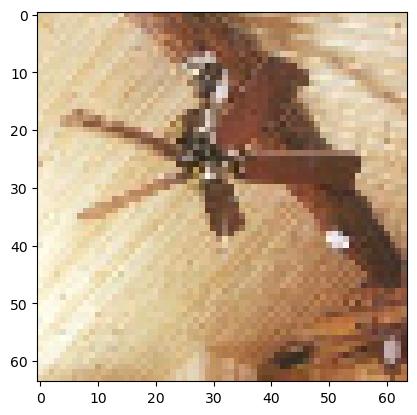

In [51]:
n=106
plt.imshow(x_test[n])
print("predicted value: ",labels[np.argmax(predicted_value[n])])
print("Actual value: ",labels[np.argmax(y_test[n])])
